# Working With Data and Visualizing It Using Pandas and Matplotlib

In [2]:
#1 import pandas library
import pandas
#4 import DataFrame from pandas, rerun this cell to correctly import DataFrame
    # hit tab to autocomplete imports
from pandas import DataFrame 

#6 import matplotib's pyplot and rerun you can use shift enter
import matplotlib.pyplot as plt # as plt is an alias for matplotlib.pyplot

In [3]:
#2 create a connection with the csv
data = pandas.read_csv('cost_revenue_clean.csv')

In [4]:
#3 show data with .describe() method !#4 is in the first cell!
data.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [5]:

# DataFrame is a method that takes two parameters: an open csv file, and an array of column names from the csv
# Example  
# open_csv = pandas.read_csv('csv_title.csv'
# DataFrame(open_csv, column_names = ['column name 1', 'column name 2'])
# You do not need to exclusively show the parameter name but its more for readability

#5a x will describe production budgets
x = DataFrame(data, columns=['production_budget_usd'])
#5b y will describe revenue
y = DataFrame(data, columns=['worldwide_gross_usd'])

# !#6 is in the first cell!

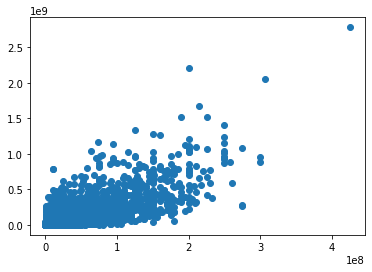

In [6]:
#7 creates scatter graph, scatter takes two parameters two data frames, one representing the x values, the other y values
plt.scatter(x,y)
#8 shows scatter graph
plt.show()

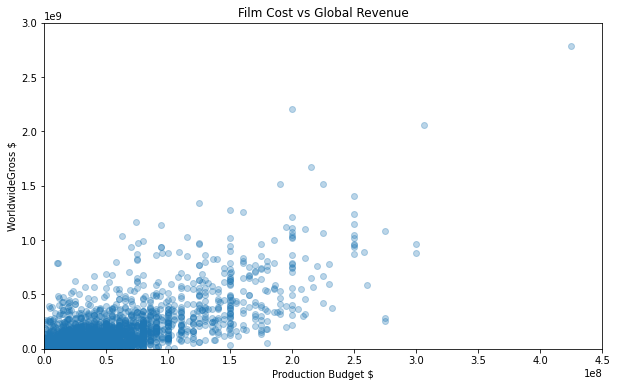

In [7]:
# These next steps will make the chart easier to read

#9 change the size of the chart using the figure method that takes in two parmeters, a width and height
plt.figure(figsize=(10,6))
plt.scatter(x,y, alpha=0.3) # using alpha=0.3 sets the opacity of the dots
#10 Create title, x and y labels by using title, xlabel, ylabel methods passing in a string parameters
plt.title("Film Cost vs Global Revenue")
plt.xlabel('Production Budget $')
plt.ylabel('WorldwideGross $')
#11 set a range for the x and y axis using the xlim and ylim, these methods takes two parameters - a min value, and a max value
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
plt.show()


 # Gradient Descent (batch) 
 ### Steepest Descent, Optimization for finding the minimum of a function

In [48]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colormap

from sympy import symbols, diff

# enable to export graphs
%matplotlib inline

## A simple cost function
## $$f(x)=x^2+x+1$$

In [9]:
# def is a keyword to define a function, def function_name(parameter):
def a_simple_cost_function(x):
    return x**2 + x + 1

In [10]:
# Make the data
# line space takes start, stop, num=int, retsteo=bool, dtype=None parameters to generate a sequence of numbers or samples
x_1 = np.linspace(start=-3,stop=3, num=100)
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

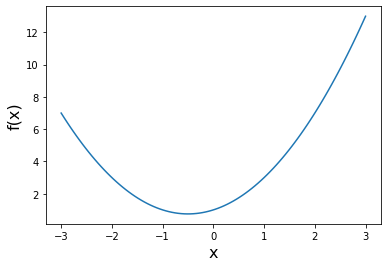

In [11]:
# create a plot using the generated data and the values returned by the simple cost function by passing in the generated data
x = x_1
y = a_simple_cost_function(x_1)
plt.plot(x, y)
plt.xlabel('x', fontsize=16) # can also alter fontsize by specifying parameter fontsize and setting it to its size
plt.ylabel('f(x)', fontsize=16)
plt.show()


## Slope and Derivatives
### Using the power rule $$\frac{d}{dx}x^n = n * x^{n-1}$$
#### So to use the power rule  $$n * x^{n-1}$$ for each part of the polynomial - it won't work on constants so just drop them

In [12]:
def derivative_of_a_simple_cost_function(x):
    return 2*x+1

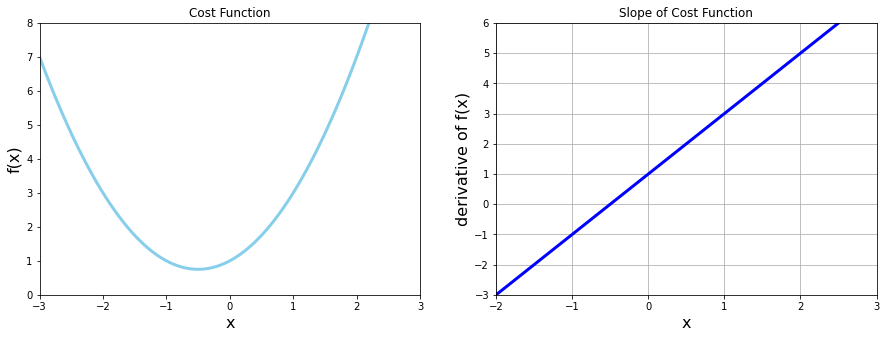

In [13]:
# plot function and derivative side by side

x = x_1
y = a_simple_cost_function(x_1)

plt.figure(figsize=[15,5]) 

# First Chart Cost Function
plt.subplot(1,2,1) # creates two plots side by side subplots takes, row index, plot index, column index - sort of like a matrix
plt.plot(x, y, color='skyblue', linewidth=3)

plt.title("Cost Function")
plt.xlabel('x', fontsize=16) 
plt.ylabel('f(x)', fontsize=16)

plt.xlim(-3,3)
plt.ylim(0,8)

# Second Chart for Derivative
plt.subplot(1,2,2)
plt.plot(x, derivative_of_a_simple_cost_function(x), color='blue', linewidth=3)
plt.grid() #generates grid 

plt.title("Slope of Cost Function")
plt.xlabel('x', fontsize=16) 
plt.ylabel('derivative of f(x)', fontsize=16)

plt.xlim(-2,3)
plt.ylim(-3,6)

plt.show()


In [14]:
# Gradient Descent, need a starting point, a learning rate, and a temproray value
new_x = 3              # starting point / random guess
previous_x = 0         # temp value - only matters for the loop
step_multiplier = 0.1  # gamma or learning rate

for n in range(500): # increased loops its closer  to 0 - so it convergings onto the min cost by brute force
        # make a guess
        previous_x = new_x
        # calculating the error of prediction - if the slope is steep then we have a high error, if its close to 0 we are very close
        gradient = derivative_of_a_simple_cost_function(previous_x)
        # moving down the cost function by adjustment/learning step against the gradient towards to the lower bound
        new_x = previous_x - step_multiplier * gradient            
        
print('Local Minimum occurs at:', new_x)
print('Slope or df(x) value at this point is: ', derivative_of_a_simple_cost_function(new_x))
print('f(x) value or cost at this point is: ', a_simple_cost_function(new_x))

# You can optimize this function to run until it hits a certain amount of percision

Local Minimum occurs at: -0.4999999999999999
Slope or df(x) value at this point is:  2.220446049250313e-16
f(x) value or cost at this point is:  0.75


In [15]:
# This section is to optimize our algorithm to stop when it hits a certain percision point or when the reduction of error
# over computation becomes too small to keep running

import math

new_x = 3         
previous_x = 0     
step_multiplier = 0.1  
precision = 0.0001 # add percision estimation
step_size = math.inf # set temp size as max number
counter = 0

#set up for the next section
x_list=[new_x]
slope_list = [derivative_of_a_simple_cost_function(new_x)]

while step_size > precision: # run until stepsize hit precision rate
        previous_x = new_x                                        
        gradient = derivative_of_a_simple_cost_function(previous_x)
        new_x = previous_x - step_multiplier * gradient
        # find the difference in the step size or learning rate and set it to the loop flag
        step_size = abs(new_x-previous_x) 
        # counts how many computations needed
        counter+=1
        # set up for next section .appends adds item to array
        x_list.append(new_x)
        slope_list.append(derivative_of_a_simple_cost_function(new_x))
        
print('Local Minimum occurs at:', new_x)
print('Slope or df(x) value at this point is: ', derivative_of_a_simple_cost_function(new_x))
print('f(x) value or cost at this point is: ', a_simple_cost_function(new_x))
print('I went through this loop: ', counter, 'times')


Local Minimum occurs at: -0.49962781616118024
Slope or df(x) value at this point is:  0.0007443676776395236
f(x) value or cost at this point is:  0.7500001385208099
I went through this loop:  41 times


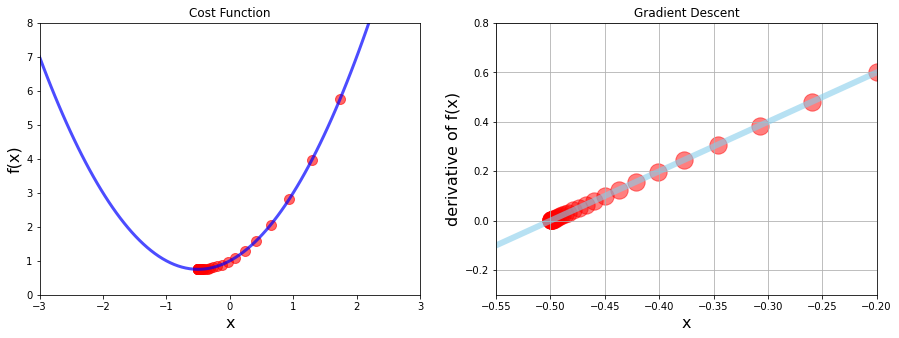

In [16]:
# Superimpost the gradient descent calculation

x = x_1
y = a_simple_cost_function(x_1)

plt.figure(figsize=[15,5]) 

# First Chart Cost Function
plt.subplot(1,2,1) 
plt.plot(x, y, color='blue', linewidth=3, alpha=0.7)

plt.title("Cost Function")
plt.xlabel('x', fontsize=16) 
plt.ylabel('f(x)', fontsize=16)

plt.xlim(-3,3)
plt.ylim(0,8)

# adding a gradient descent values as a scatter plot to the cost function
values = np.array(x_list) #typecasting list to an array
plt.scatter(x_list, a_simple_cost_function(values), color='red', s=100, alpha=0.6) # s is size of the dots

# Second Chart for Derivative
plt.subplot(1,2,2)
plt.plot(x, derivative_of_a_simple_cost_function(x), color='skyblue', linewidth=6, alpha=0.6)
plt.grid() 

plt.title("Gradient Descent")
plt.xlabel('x', fontsize=16) 
plt.ylabel('derivative of f(x)', fontsize=16)

plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)

# adding a gradient descent values as a scatter plot to the derivative slope
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.5)

plt.show()


## Multiple Minima vs Inital Guess & Advanced Functions
### $$g(x) = x^4-4x^2+5$$

In [17]:
# Make some more data
x_2 = np.linspace(-2,2,1000)

# make cost and  derivative function
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

# converts gradient descent steps into a reusable function

def gradient_descent(derivative_func, intial_guess, multiplier=0.02, precision=0.0001, max_iter=300, ignore_precision=True):
    """
    @params derivative_func takes a function object 
    @params intial_guess takes an integer - this will act as the start of a function
    @params multipler takes a float - this will act as the learning rate or step rate. The default value is 0.02
    @params percision takes a float - this the yeild where the function will stop to. The default value is 0.0001
    @params max_iter takes an interger and will stop loop at that value
    """
    new_x = intial_guess         
    step_size = math.inf 

    x_list=[new_x]
    slope_list = [derivative_func(new_x)]
    
    # adjusted the function to listen to iteration count, but if percision is met in a quicker manner it is
    # returned unless param given says not to
    while len(x_list) < max_iter:
        previous_x = new_x                                        
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        step_size = abs(new_x-previous_x) 
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if step_size < precision and not ignore_precision:
            break

    # this returns a tuple data structure which an ummutable list
    return new_x, x_list, slope_list, step_size

    

In [18]:
# this is unpacking the tuple into variables the second line does not interrupt the parameters and its done for readability
local_min, list_x, deriv_list, step_size = gradient_descent(derivative_func=dg, intial_guess=0.1, 
                                                 multiplier=0.02, precision=0.001)
print('Local Minimum occurs at:', local_min)
print('Slope or df(x) value at this point is: ', g(local_min))
print('total of ', len(list_x), "steps")


Local Minimum occurs at: 1.4142135623730947
Slope or df(x) value at this point is:  1.0
total of  300 steps


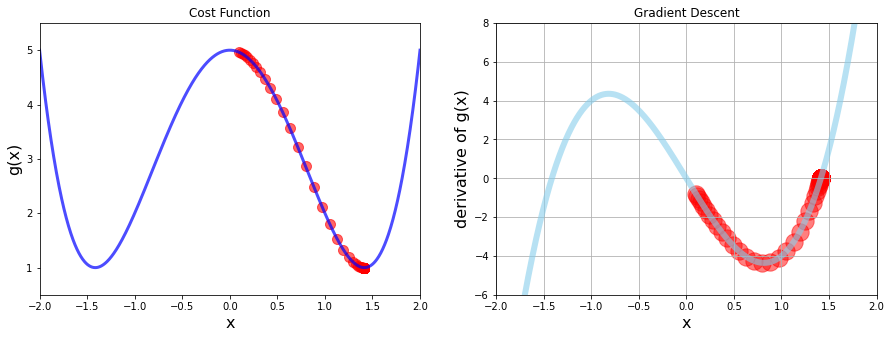

In [19]:
x = x_2
y = g(x_2)

plt.figure(figsize=[15,5]) 

# First Chart Cost Function
plt.subplot(1,2,1) 
plt.plot(x, y, color='blue', linewidth=3, alpha=0.7)

plt.title("Cost Function")
plt.xlabel('x', fontsize=16) 
plt.ylabel('g(x)', fontsize=16)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)


values = np.array(list_x)
plt.scatter(list_x, g(values), color='red', s=100, alpha=0.6) 

# Second Chart for Derivative
plt.subplot(1,2,2)
plt.plot(x, dg(x), color='skyblue', linewidth=6, alpha=0.6)
plt.grid() 

plt.title("Gradient Descent")
plt.xlabel('x', fontsize=16) 
plt.ylabel('derivative of g(x)', fontsize=16)

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.scatter(list_x, deriv_list, color='red', s=300, alpha=0.5)

plt.show()


## Divergence and Overflow
### $$h(x) = x^5-2x^4+2$$

In [20]:
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4-8*x**3

local_min, list_x, deriv_list, step_size = gradient_descent(derivative_func=dh, intial_guess=0.8, 
                                                 multiplier=0.02, precision=0.001, ignore_precision=False)

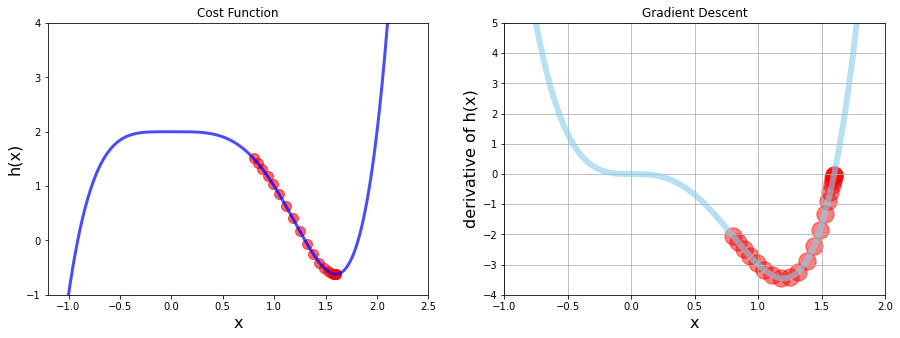

Local Minimum occurs at: 1.5985801335007122
Slope or df(x) value at this point is:  -0.6214193925616023
total of  22 steps step size 0.0009775908157949598


In [21]:

x = x_3
y = h(x_3)

plt.figure(figsize=[15,5]) 

# First Chart Cost Function
plt.subplot(1,2,1) 
plt.plot(x, y, color='blue', linewidth=3, alpha=0.7)

plt.title("Cost Function")
plt.xlabel('x', fontsize=16) 
plt.ylabel('h(x)', fontsize=16)

plt.xlim(-1.2,2.5)
plt.ylim(-1,4)


values = np.array(list_x)
plt.scatter(list_x, h(values), color='red', s=100, alpha=0.6) 

# Second Chart for Derivative
plt.subplot(1,2,2)
plt.plot(x, dh(x), color='skyblue', linewidth=6, alpha=0.6)
plt.grid() 

plt.title("Gradient Descent")
plt.xlabel('x', fontsize=16) 
plt.ylabel('derivative of h(x)', fontsize=16)

plt.xlim(-1,2)
plt.ylim(-4,5)

plt.scatter(list_x, deriv_list, color='red', s=300, alpha=0.5)

plt.show()

print('Local Minimum occurs at:', local_min)
print('Slope or df(x) value at this point is: ', h(local_min))
print('total of ', len(list_x), "steps", "step size", step_size)

# You can see on the chart that the cost function has a inf lower bound that would cause an overflow, but the algorithm
# diverges to find the most attainable lowest cost


In [22]:
# Note you can read documentation through help() example:

help(math)

# also you can shift tab on a function and it will give you info as well (you have to click on the function name first)


Help on built-in module math:

NAME
    math

DESCRIPTION
    This module provides access to the mathematical functions
    defined by the C standard.

FUNCTIONS
    acos(x, /)
        Return the arc cosine (measured in radians) of x.
        
        The result is between 0 and pi.
    
    acosh(x, /)
        Return the inverse hyperbolic cosine of x.
    
    asin(x, /)
        Return the arc sine (measured in radians) of x.
        
        The result is between -pi/2 and pi/2.
    
    asinh(x, /)
        Return the inverse hyperbolic sine of x.
    
    atan(x, /)
        Return the arc tangent (measured in radians) of x.
        
        The result is between -pi/2 and pi/2.
    
    atan2(y, x, /)
        Return the arc tangent (measured in radians) of y/x.
        
        Unlike atan(y/x), the signs of both x and y are considered.
    
    atanh(x, /)
        Return the inverse hyperbolic tangent of x.
    
    ceil(x, /)
        Return the ceiling of x as an Integral.
      

## Learning Rates
### It's necessary to pick the appropriate learning rates


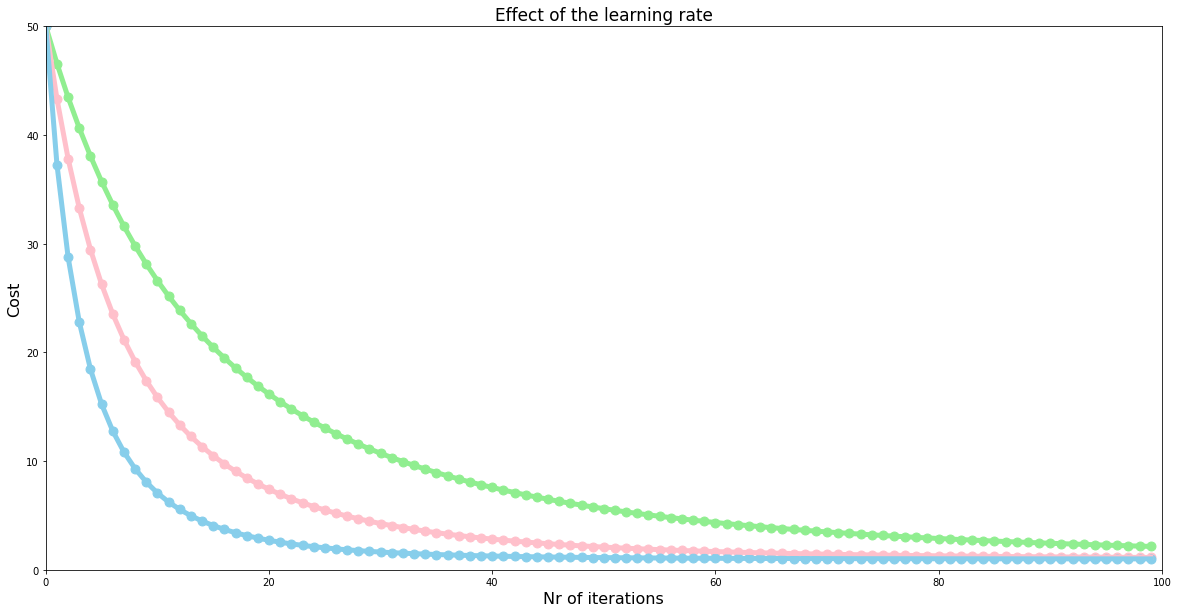

In [23]:
n=100
low_gamma = gradient_descent(derivative_func=dg, intial_guess=3, 
                                                 multiplier=0.0005, precision=0.001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, intial_guess=3, 
                                                 multiplier=0.001, precision=0.001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, intial_guess=3, 
                                                 multiplier=0.002, precision=0.001, max_iter=n)

plt.figure(figsize=[20,10])
plt.xlim(0,n)
plt.ylim(0,50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for chart
# Y Axis Data: Convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# X Axis
iteration_list = list(range(0,n))

plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80) 

plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='pink', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='pink', s=80) 

plt.plot(iteration_list, g(np.array(high_gamma[1])), color='skyblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='skyblue', s=80) 


# Gamma too high will never consistently come close to the min cost

Techniques to get the right Gamma:  
One technique is have schedules to run different learning rates  
Bold Driver:    
If the error rate was reduced since the last iteration you can increase to 5%   
And if error rate was increased, reset of the values of parameters to the prev iteration and decrease learning rate by 50%  

# Data Visualization with 3D Charts
## Minimise $$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$

In [24]:
def f(x,y):
    return 1/(( 3**(-x**2 - y**2)) + 1)

In [36]:
x_4 = np.linspace(-2,2,200)
y_4 = np.linspace(-2,2,200)

print(x_4.shape) # .shape describes x_4 as a vector

x_4, y_4 = np.meshgrid(x_4,y_4) # this method returns a coord matrix from a coord vector
print(x_4.shape)

(200,)
(200, 200)


Text(0.5, 0, 'f(x,y)')

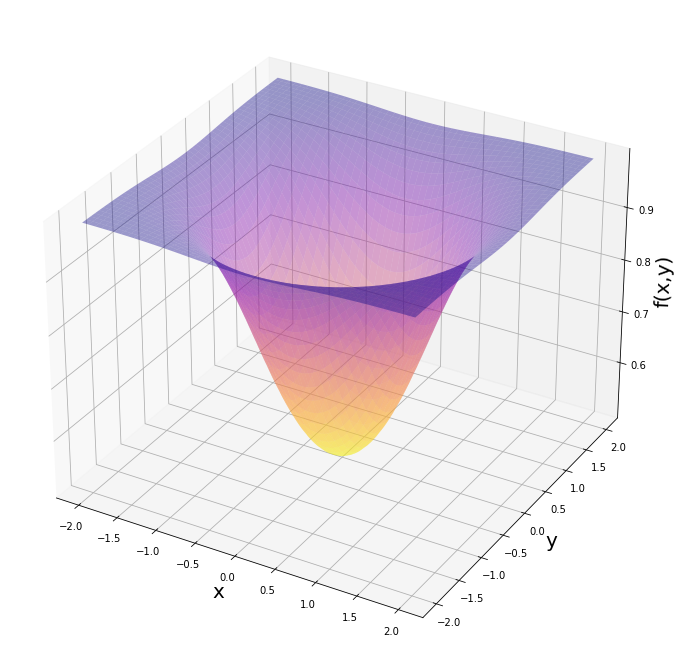

In [61]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d') # creates 3d graph

ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap=cm.plasma_r, alpha=0.4) # plotsurface takes, x,y,z but they require to be two dimensional array
#cmap applies the color map for the graph

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('f(x,y)', fontsize=20)

## Partial Derivatives and Symbolic Computation
$$\frac{\partial f}{\partial x} = \frac{2x\cdot ln(3)\cdot3^{-x^2 - y^2}}{(3^{-x^2 - y^2} + 1)^2}$$
$$\frac{\partial f}{\partial x} = \frac{2y\cdot ln(3)\cdot3^{-x^2 - y^2}}{(3^{-x^2 - y^2} + 1)^2}$$

In [66]:
a, b = symbols('x,y') # upacks values of x and y to a and b

print('cost func', f(a,b)) # shows cost function

print('show partial derivative in respect to a', diff(f(a,b),a)) 
print('show partial derivative in respect to b', diff(f(a,b),b)) 

print(f(a,b).evalf(subs={a:1.8, b:1.0})) #evaluate our function at this point, subs taking a dictionary as a param
print(diff(f(a,b),a).evalf(subs={a:1.8, b:1.0})) # evaluate at this partial derivative

cost func 1/(3**(-x**2 - y**2) + 1)
show partial derivative in respect to a 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
show partial derivative in respect to b 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
0.990604794032582
0.0368089716197505


## Batch Gradient Descent with Sympy

In [96]:
# Set up
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0]) #inital guess

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

print('values in gradient array ', gradients)
print('minimum occurs at x value of ', params[0])
print('minimum occurs at y value of ', params[1]) 
print('the cost is: ', f(params[0], params[1]))

values in gradient array  [2.01013037525579e-11 1.11673909736433e-11]
minimum occurs at x value of  3.45838599885832e-11
minimum occurs at y value of  1.92132555492129e-11
the cost is:  0.500000000000000


In [100]:
from math import log

def fdx(x,y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2

def fdy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2

In [101]:
fdx(1.8, 1.0)

0.036808971619750504

In [102]:
# Set up
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0]) #inital guess

for n in range(max_iter):
    gradient_x = fdx(params[0],params[1])
    gradient_y = fdy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

print('values in gradient array ', gradients)
print('minimum occurs at x value of ', params[0])
print('minimum occurs at y value of ', params[1]) 
print('the cost is: ', f(params[0], params[1]))

values in gradient array  [2.01013038e-11 1.11673910e-11]
minimum occurs at x value of  3.458385998858304e-11
minimum occurs at y value of  1.9213255549212797e-11
the cost is:  0.5


## Graphing 3D Gradient Descent & Adv Numpy Array

In [106]:

multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0])
values_array = params
print(values_array.shape)
values_array = params.reshape(1,2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fdx(params[0],params[1])
    gradient_y = fdy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

print('values in gradient array ', gradients)
print('minimum occurs at x value of ', params[0])
print('minimum occurs at y value of ', params[1]) 
print('the cost is: ', f(params[0], params[1]))

(2,)
(1, 2)
values in gradient array  [2.01013038e-11 1.11673910e-11]
minimum occurs at x value of  3.458385998858304e-11
minimum occurs at y value of  1.9213255549212797e-11
the cost is:  0.5
